In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [73]:
data = pd.read_excel('DATA.xlsx')

In [75]:
data.head()

,Unnamed: 0,Avg.area income,Avg.area House age,Avg.area no of rooms,Avg.areas no of bedrooms,Area Population,Price,Address
0,0,79545.458574,5.682861,7.009188,5.05,23086.800503,1059034,Davangere
1,1,79546.458574,6.682861,8.009188,6.05,23087.800503,1059035,Haveri
2,2,79547.458574,7.682861,9.009188,7.05,23088.800503,1059036,Durga
3,3,79548.458574,8.682861,10.009188,8.05,23089.800503,1059037,Dharwad
4,4,79549.458574,9.682861,11.009188,9.05,23090.800503,1059038,Hubbali


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                51 non-null     int64  
 1   Avg.area income           51 non-null     float64
 2   Avg.area House age        51 non-null     float64
 3   Avg.area no of rooms      51 non-null     float64
 4   Avg.areas no of bedrooms  51 non-null     float64
 5   Area Population           51 non-null     float64
 6   Price                     51 non-null     int64  
 7   Address                   51 non-null     object 
dtypes: float64(5), int64(2), object(1)
memory usage: 3.3+ KB


In [79]:
data.describe()

,Unnamed: 0,Avg.area income,Avg.area House age,Avg.area no of rooms,Avg.areas no of bedrooms,Area Population,Price
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01
mean,25.000000,79570.458574,30.682861,32.009188,30.050000,23111.800503,1.059059e+06
std,14.866069,14.866069,14.866069,14.866069,14.866069,14.866069,1.486607e+01
min,0.000000,79545.458574,5.682861,7.009188,5.050000,23086.800503,1.059034e+06
25%,12.500000,79557.958574,18.182861,19.509188,17.550000,23099.300503,1.059046e+06
50%,25.000000,79570.458574,30.682861,32.009188,30.050000,23111.800503,1.059059e+06
75%,37.500000,79582.958574,43.182861,44.509188,42.550000,23124.300503,1.059072e+06
max,50.000000,79595.458574,55.682861,57.009188,55.050000,23136.800503,1.059084e+06


In [81]:
data.columns

Index(['Unnamed: 0', 'Avg.area income', 'Avg.area House age',
       'Avg.area no of rooms', 'Avg.areas no of bedrooms', 'Area Population',
       'Price', 'Address'],
      dtype='object')

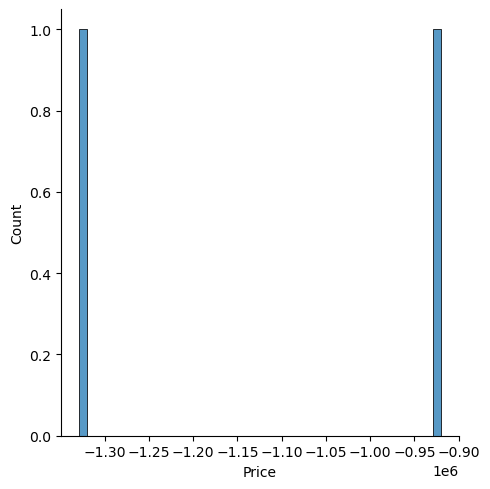

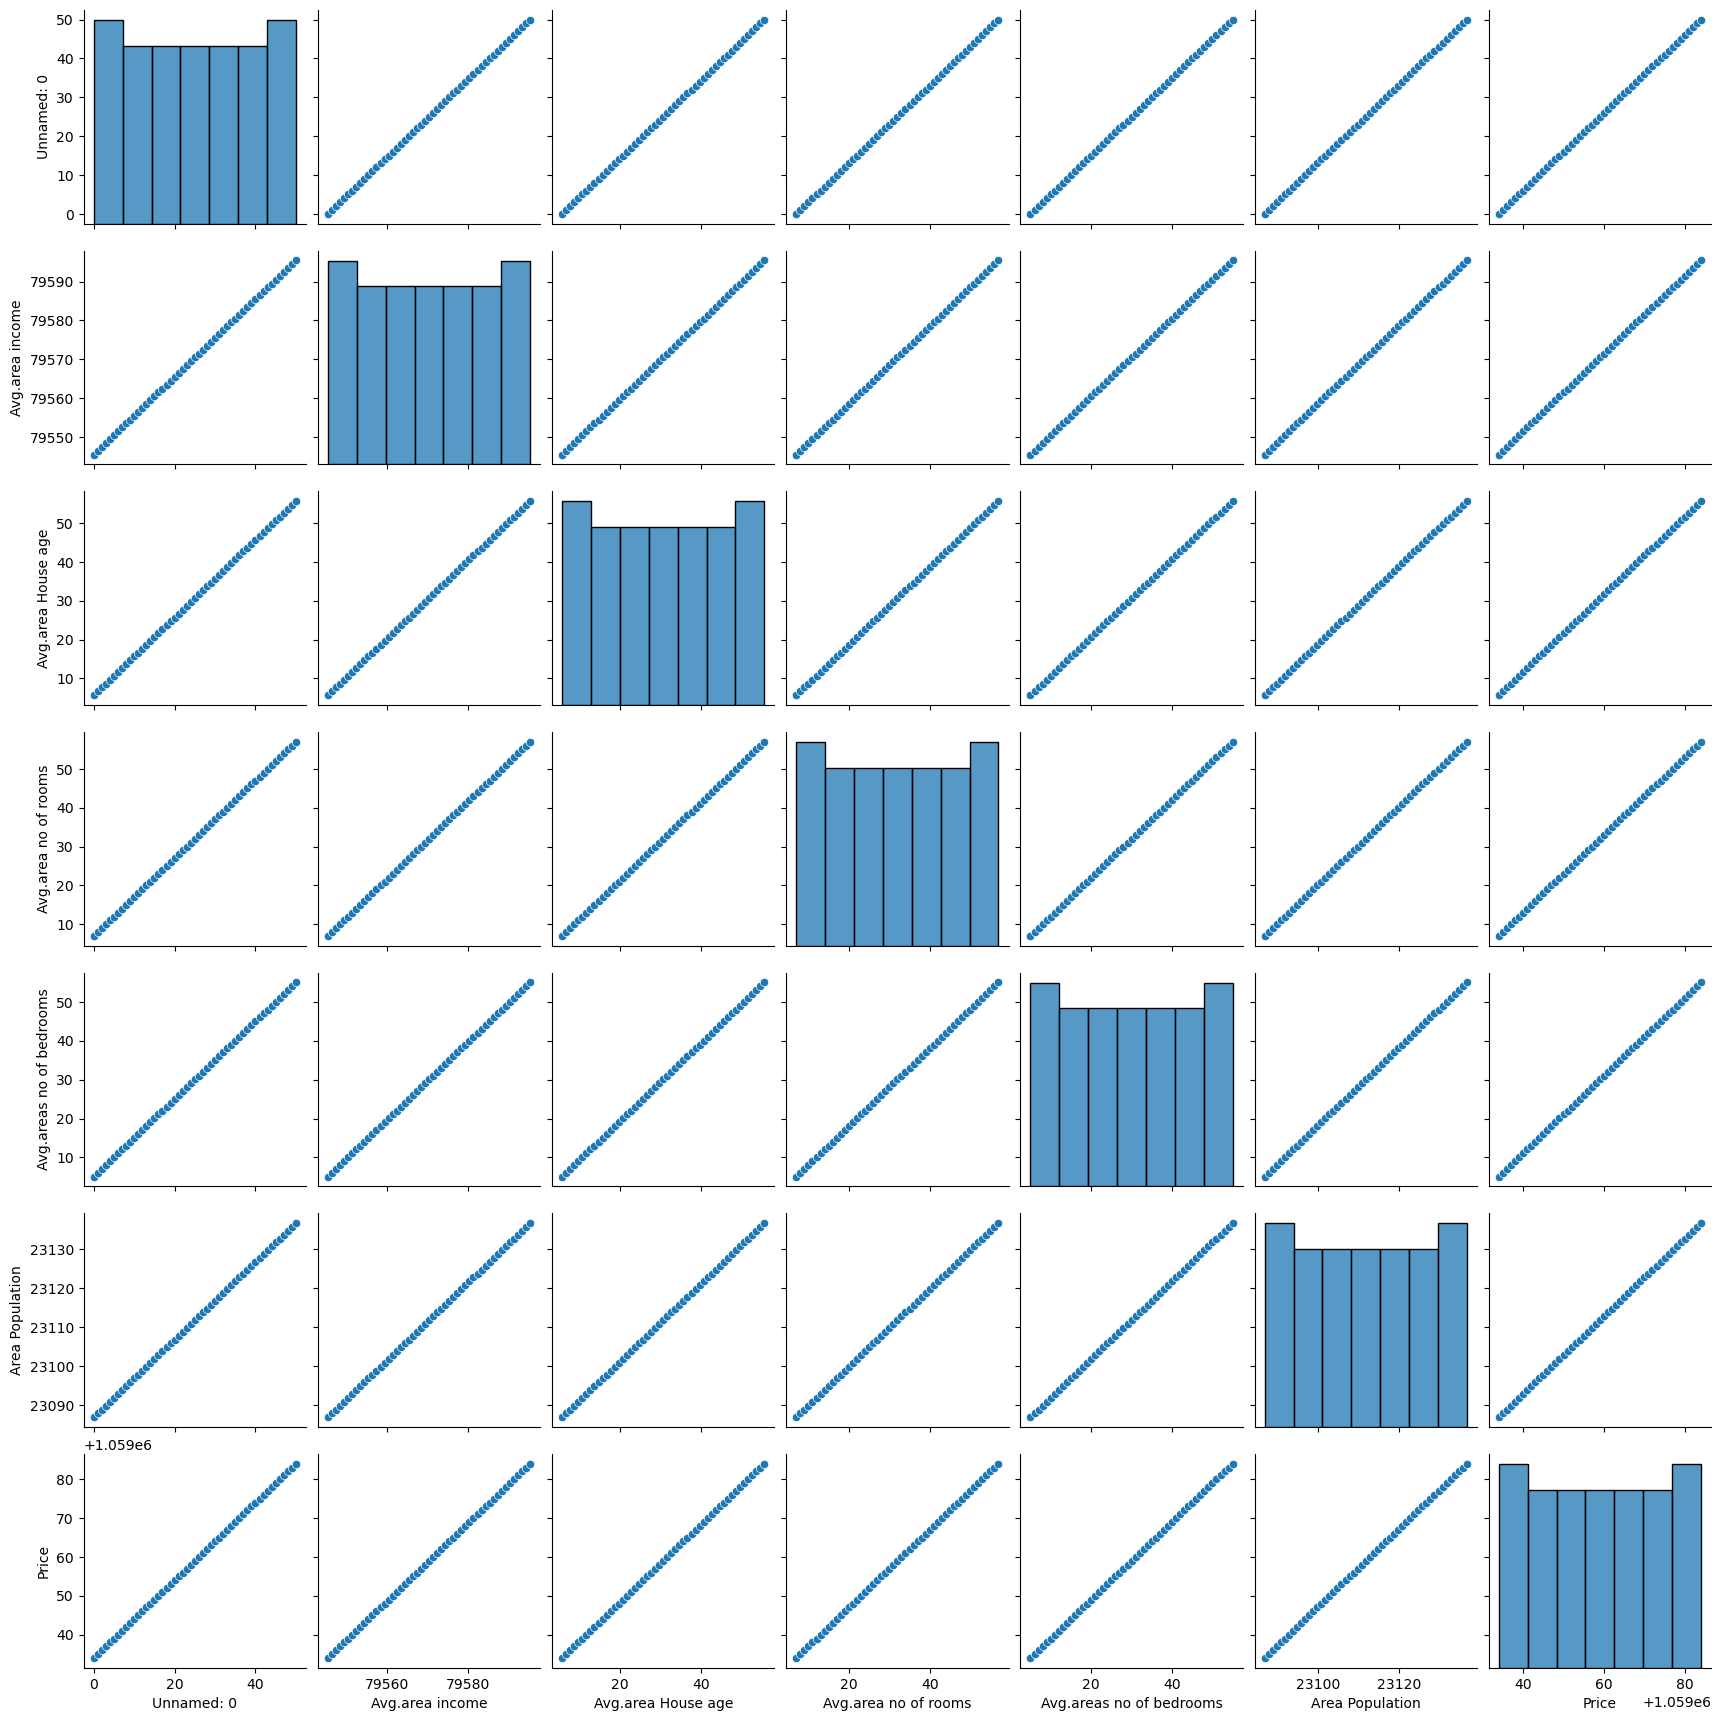

In [83]:
sns.pairplot(data)
plt.show()

In [85]:
X = data[['Avg.area income', 'Avg.area House age',
       'Avg.area no of rooms', 'Avg.areas no of bedrooms', 'Area Population']]

y = data['Price']

In [87]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.40, random_state=101)

In [91]:
from sklearn.linear_model import LinearRegression

In [93]:
lm = LinearRegression()

In [95]:
lm.fit(X_train, y_train)

LinearRegression()

In [97]:
X_train.head()

,Avg.area income,Avg.area House age,Avg.area no of rooms,Avg.areas no of bedrooms,Area Population
38,79583.458574,43.682861,45.009188,43.05,23124.800503
45,79590.458574,50.682861,52.009188,50.05,23131.800503
39,79584.458574,44.682861,46.009188,44.05,23125.800503
10,79555.458574,15.682861,17.009188,15.05,23096.800503
50,79595.458574,55.682861,57.009188,55.05,23136.800503


In [99]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [101]:
print(lm.coef_.shape)

(5,)


In [103]:
print(X.shape) 

(51, 5)


In [105]:
coeff_df

,Coefficient
Avg.area income,0.065734
Avg.area House age,0.223719
Avg.area no of rooms,0.223705
Avg.areas no of bedrooms,0.223645
Area Population,0.263197


In [107]:
predictions = lm.predict(X_test)

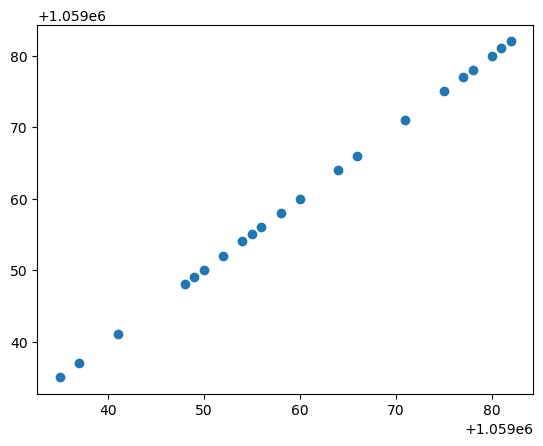

In [109]:
plt.scatter(y_test, predictions)
plt.show()

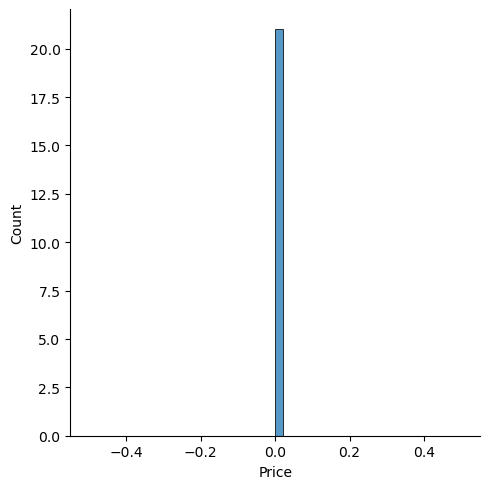

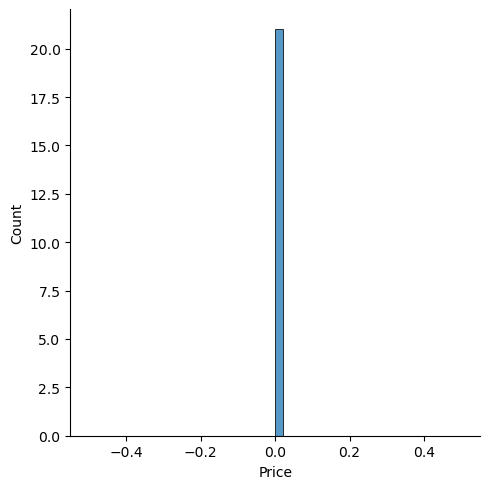

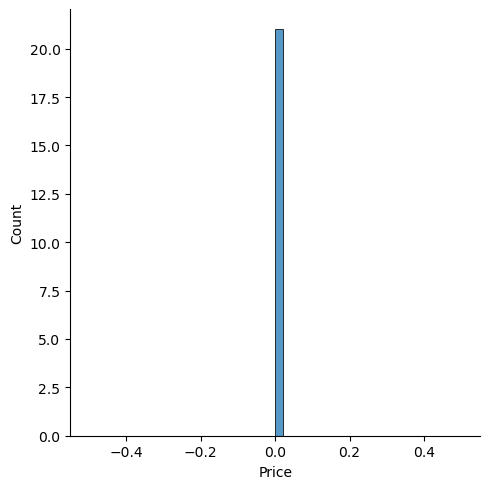

In [117]:
sns.displot((y_test-predictions),bins=50);
plt.show()